# Heart Disease Diagnostic Analysis

In [76]:
#Importing Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [77]:
# Path to the Excel dataset
excel_data_path = 'cleveland_data.xlsx'

# Load the Excel dataset into a DataFrame
excel_data = pd.read_excel(excel_data_path)

# Display the first few rows of the dataset to understand its structure
excel_data.head()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,2
2,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0


In [78]:
#All Columns in the Dataset

excel_data.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num'],
      dtype='object')

### Dataset Variables Overview

The dataset contains the following clinical attributes related to heart disease diagnosis:

- `age`: Age of the patient in years.
- `sex`: Sex of the patient (1 = male, 0 = female).
- `cp`: Chest pain type, a categorical variable with four levels:
  - 1: Typical angina
  - 2: Atypical angina
  - 3: Non-anginal pain
  - 4: Asymptomatic
- `trestbps`: Resting blood pressure on admission to the hospital (in mm Hg).
- `chol`: Serum cholesterol in mg/dl.
- `fbs`: Fasting blood sugar > 120 mg/dl (1 = true, 0 = false).
- `restecg`: Resting electrocardiographic results:
  - 0: Normal
  - 1: Having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
  - 2: Showing probable or definite left ventricular hypertrophy by Estes' criteria
- `thalach`: Maximum heart rate achieved during the test.
- `exang`: Exercise induced angina (1 = yes, 0 = no).
- `oldpeak`: ST depression induced by exercise relative to rest (in mm).
- `slope`: The slope of the peak exercise ST segment:
  - 1: Upsloping
  - 2: Flat
  - 3: Downsloping
- `ca`: Number of major vessels (0-3) colored by fluoroscopy.
- `thal`: Thallium stress test result:
  - 3: Normal
  - 6: Fixed defect
  - 7: Reversible defect
- `num`: Diagnosis of heart disease (angiographic disease status):
  - 0: Less than 50% diameter narrowing (no disease)
  - 1-4: Various degrees of disease


## Data Cleaning

In [79]:
#Checking NULL Values

excel_data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          4
thal        2
num         0
dtype: int64

Missing Values:

- ca: 4 missing entries
- thal: 2 missing entries

In [80]:
# Handle missing values by imputing the median
excel_data['ca'].fillna(excel_data['ca'].median(), inplace=True)
excel_data['thal'].fillna(excel_data['thal'].median(), inplace=True)

# Define a function to handle outliers using IQR
def handle_outliers(column):
    Q1 = excel_data[column].quantile(0.25)
    Q3 = excel_data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    excel_data[column] = np.where(excel_data[column] < lower_bound, lower_bound, excel_data[column])
    excel_data[column] = np.where(excel_data[column] > upper_bound, upper_bound, excel_data[column])

# Applying outlier handling to 'chol' and 'oldpeak'
handle_outliers('chol')
handle_outliers('oldpeak')

# Converting categorical variables to 'category' dtype
categorical_columns = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'thal']
excel_data[categorical_columns] = excel_data[categorical_columns].astype('category')

# Final check on the cleaned data
cleaned_summary = excel_data.describe(include='all')
cleaned_summary


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
count,303.000000,303.0,303.0,303.000000,303.000000,303.0,303.0,303.000000,303.0,303.000000,303.0,303.000000,303.0,303.000000
unique,NaN,2.0,4.0,NaN,NaN,2.0,3.0,NaN,2.0,NaN,3.0,NaN,3.0,NaN
top,NaN,1.0,4.0,NaN,NaN,0.0,0.0,NaN,0.0,NaN,1.0,NaN,3.0,NaN
freq,NaN,206.0,144.0,NaN,NaN,258.0,151.0,NaN,204.0,NaN,142.0,NaN,168.0,NaN
mean,54.438944,NaN,NaN,131.689769,245.584158,NaN,NaN,149.607261,NaN,1.024422,NaN,0.663366,NaN,0.937294
std,9.038662,NaN,NaN,17.599748,47.558803,NaN,NaN,22.875003,NaN,1.110127,NaN,0.934375,NaN,1.228536
min,29.000000,NaN,NaN,94.000000,126.000000,NaN,NaN,71.000000,NaN,0.000000,NaN,0.000000,NaN,0.000000
25%,48.000000,NaN,NaN,120.000000,211.000000,NaN,NaN,133.500000,NaN,0.000000,NaN,0.000000,NaN,0.000000
50%,56.000000,NaN,NaN,130.000000,241.000000,NaN,NaN,153.000000,NaN,0.800000,NaN,0.000000,NaN,0.000000
75%,61.000000,NaN,NaN,140.000000,275.000000,NaN,NaN,166.000000,NaN,1.600000,NaN,1.000000,NaN,2.000000


In [81]:
# Check for missing values in the dataset
missing_data = excel_data.isnull().sum()

# Descriptive statistics for the dataset to identify potential outliers
statistical_summary = excel_data.describe()

missing_data, statistical_summary


(age         0
 sex         0
 cp          0
 trestbps    0
 chol        0
 fbs         0
 restecg     0
 thalach     0
 exang       0
 oldpeak     0
 slope       0
 ca          0
 thal        0
 num         0
 dtype: int64,
               age    trestbps        chol     thalach     oldpeak          ca  \
 count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
 mean    54.438944  131.689769  245.584158  149.607261    1.024422    0.663366   
 std      9.038662   17.599748   47.558803   22.875003    1.110127    0.934375   
 min     29.000000   94.000000  126.000000   71.000000    0.000000    0.000000   
 25%     48.000000  120.000000  211.000000  133.500000    0.000000    0.000000   
 50%     56.000000  130.000000  241.000000  153.000000    0.800000    0.000000   
 75%     61.000000  140.000000  275.000000  166.000000    1.600000    1.000000   
 max     77.000000  200.000000  371.000000  202.000000    4.000000    3.000000   
 
               num  
 count  303.00

## Exploratory Data Analysis (EDA)

In [82]:
# Ensure matplotlib inline plotting
%matplotlib inline

# Load the dataset
data_path = 'cleveland_data.xlsx' 
data = pd.read_excel(data_path)

### Initial Data Review

In [83]:
# Display the first few rows of the dataset
display(data.head())

# Checking for missing values in the dataset
display(data.isnull().sum())


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,2
2,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0


age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          4
thal        2
num         0
dtype: int64

### Summary Statistics

In [84]:
# List of categorical column names (update this list as per your specific dataset)
categorical_columns = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'thal', 'num']

# Convert these columns to 'category' data type
for col in categorical_columns:
    data[col] = data[col].astype('category')

# Confirm changes
data.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   age       303 non-null    int64   
 1   sex       303 non-null    category
 2   cp        303 non-null    category
 3   trestbps  303 non-null    int64   
 4   chol      303 non-null    int64   
 5   fbs       303 non-null    category
 6   restecg   303 non-null    category
 7   thalach   303 non-null    int64   
 8   exang     303 non-null    category
 9   oldpeak   303 non-null    float64 
 10  slope     303 non-null    category
 11  ca        299 non-null    float64 
 12  thal      301 non-null    category
 13  num       303 non-null    category
dtypes: category(8), float64(2), int64(4)
memory usage: 17.9 KB


In [85]:
# Descriptive statistics for categorical features
display(data.describe(include=['category']))


,sex,cp,fbs,restecg,exang,slope,thal,num
count,303,303,303,303,303,303,301.0,303
unique,2,4,2,3,2,3,3.0,5
top,1,4,0,0,0,1,3.0,0
freq,206,144,258,151,204,142,166.0,164


### Univariate Analysis

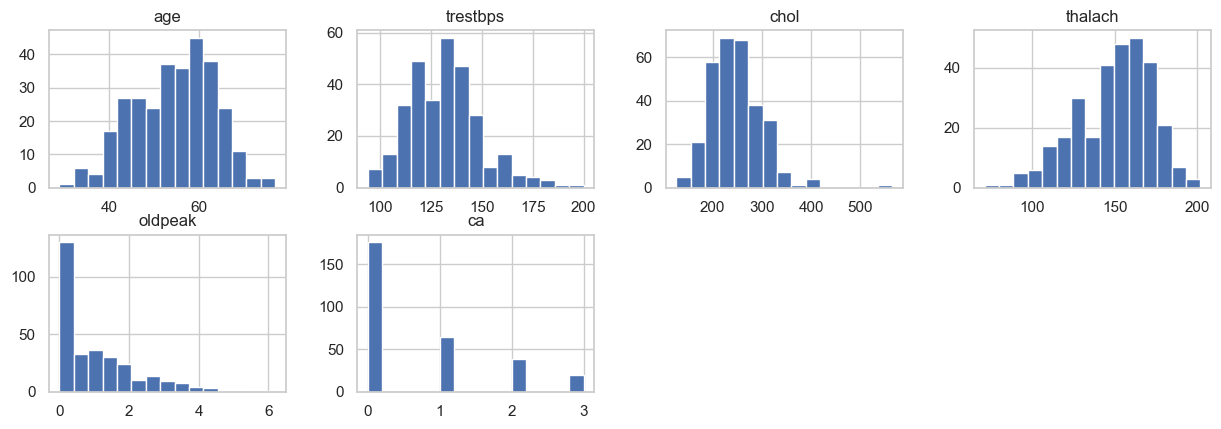

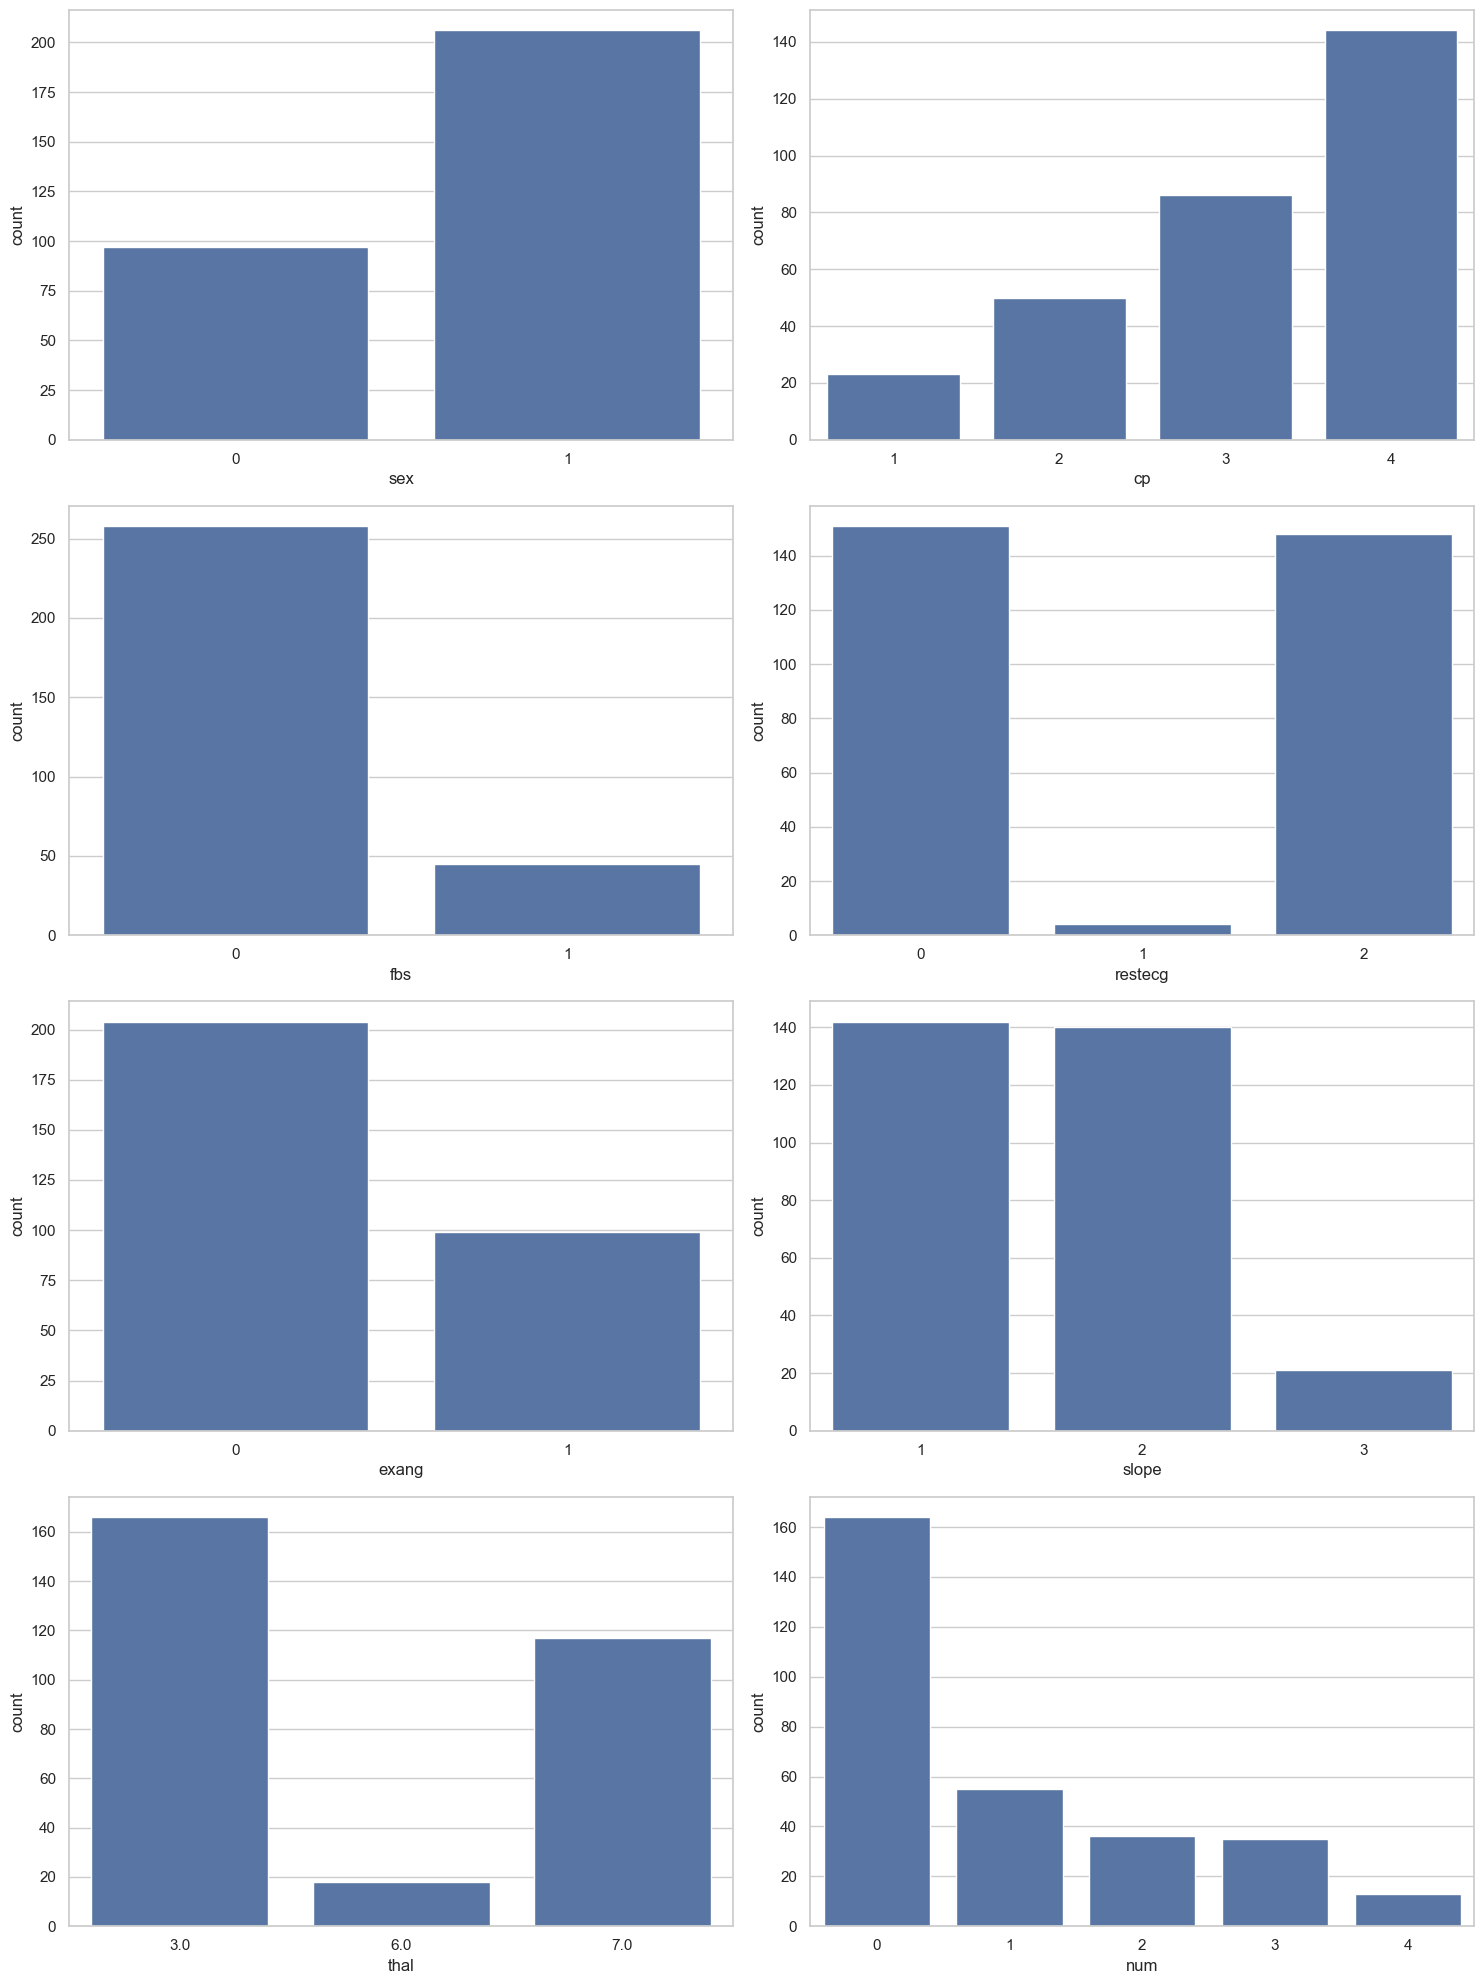

In [86]:
# Histograms for all numeric features
data.hist(bins=15, figsize=(15, 10), layout=(4, 4))
plt.show()

# Bar charts for categorical variables
categorical_vars = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'thal', 'num']
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(15, 20))
for i, var in enumerate(categorical_vars):
    row, col = i // 2, i % 2
    sns.countplot(x=var, data=data, ax=axes[row][col])
plt.tight_layout()
plt.show()


### Bivariate Analysis

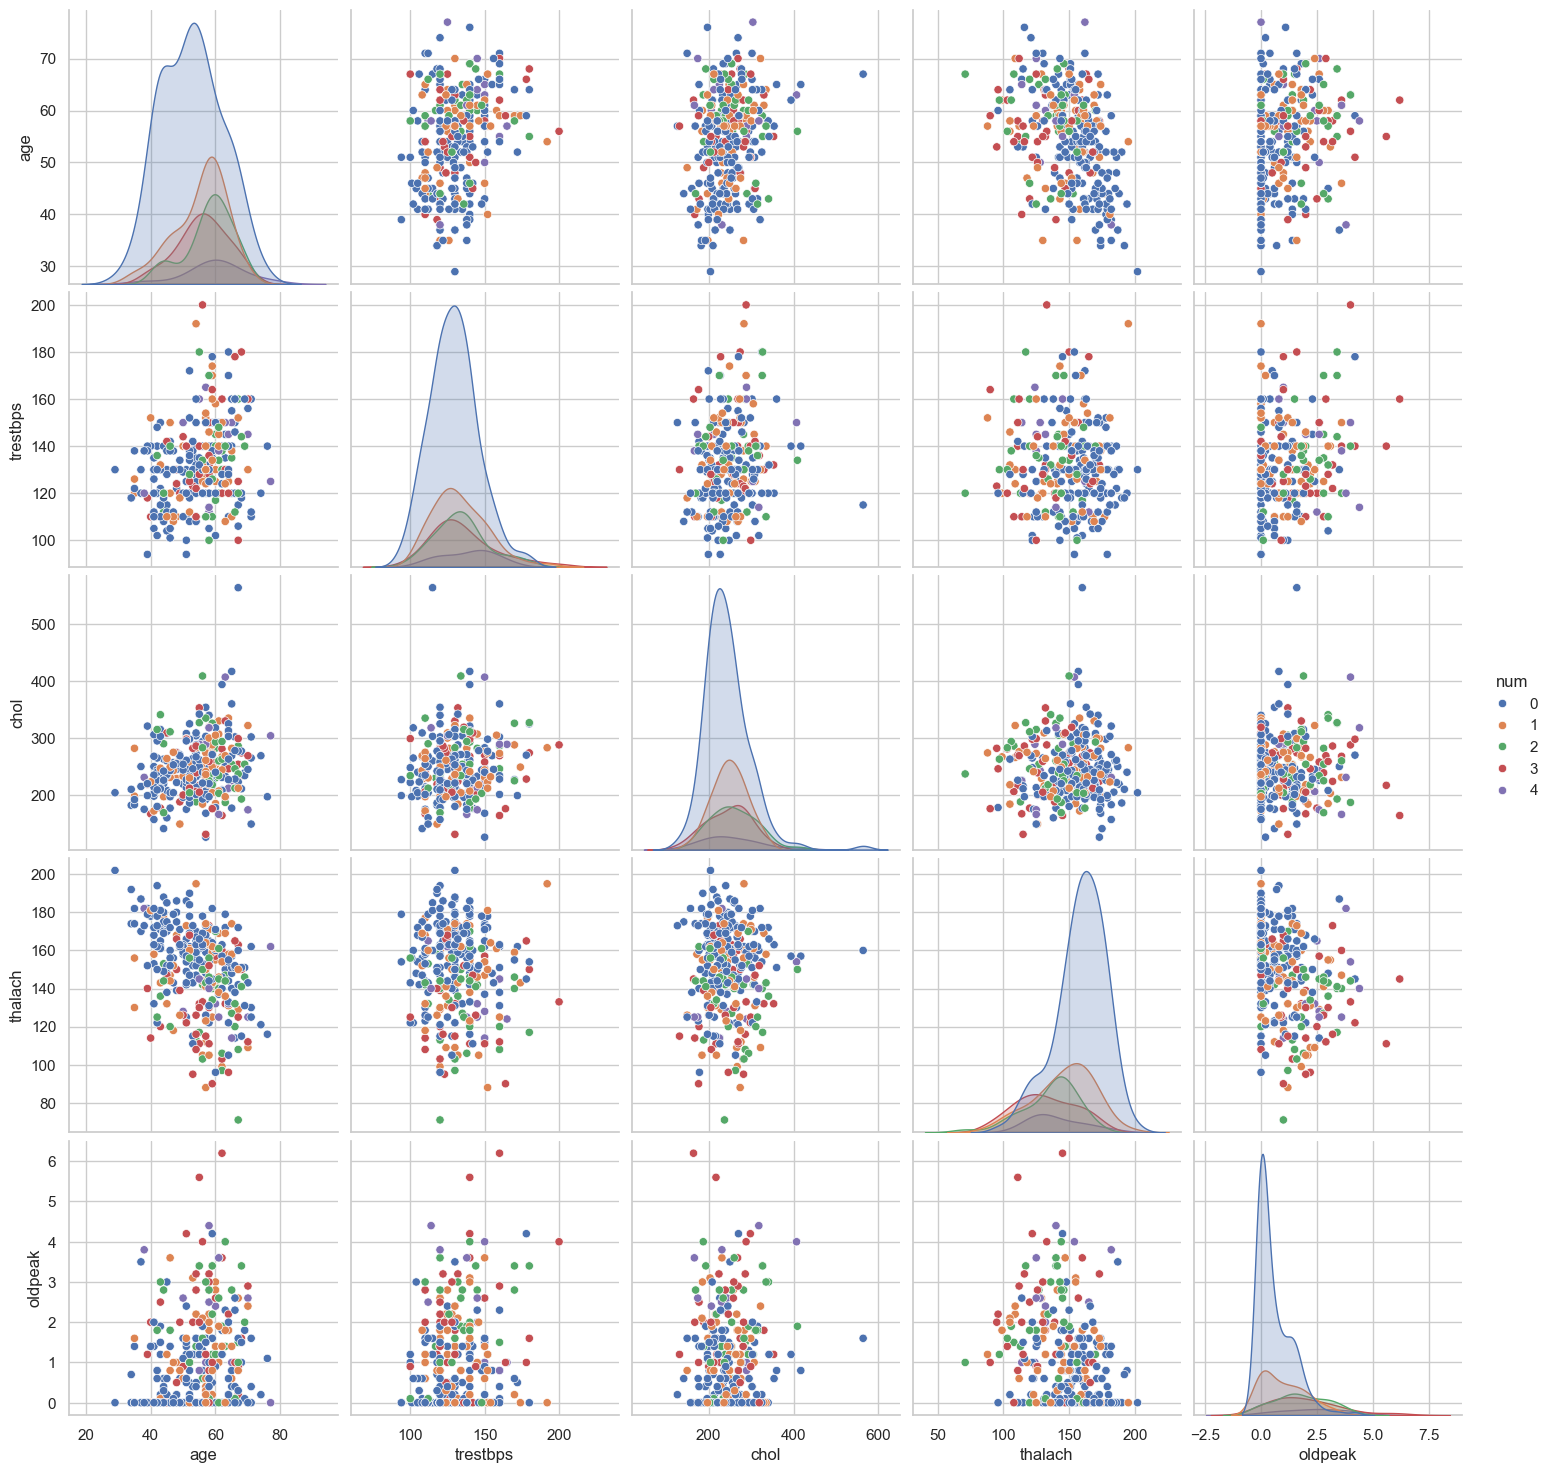

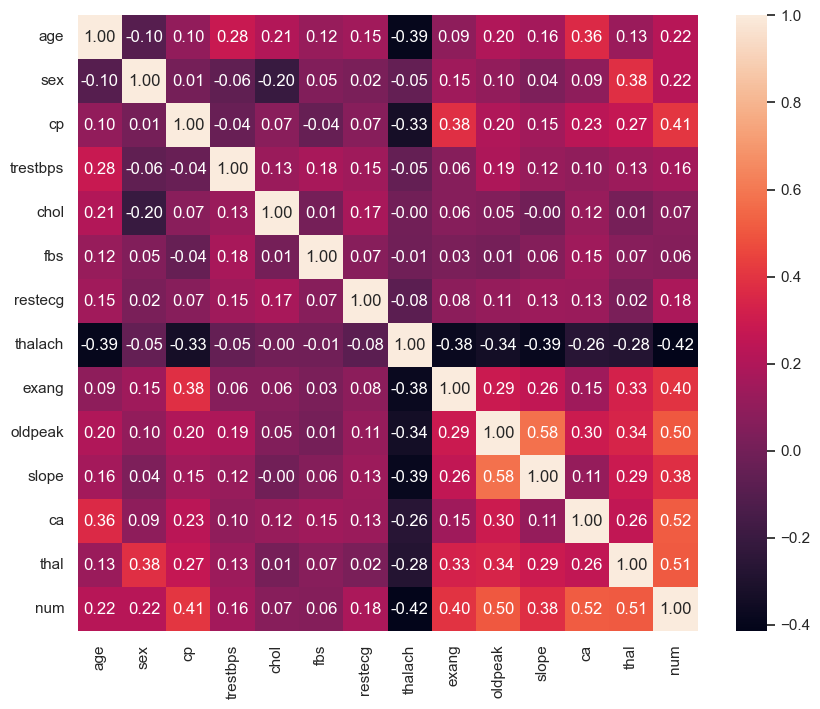

In [87]:
# Scatter plots between 'age', 'trestbps', 'chol', 'thalach', 'oldpeak' and 'num'
sns.pairplot(data, vars=['age', 'trestbps', 'chol', 'thalach', 'oldpeak'], hue='num', height=3)
plt.show()

# Correlation matrix heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), annot=True, fmt=".2f")
plt.show()


### Boxplot Analysis for Outliers

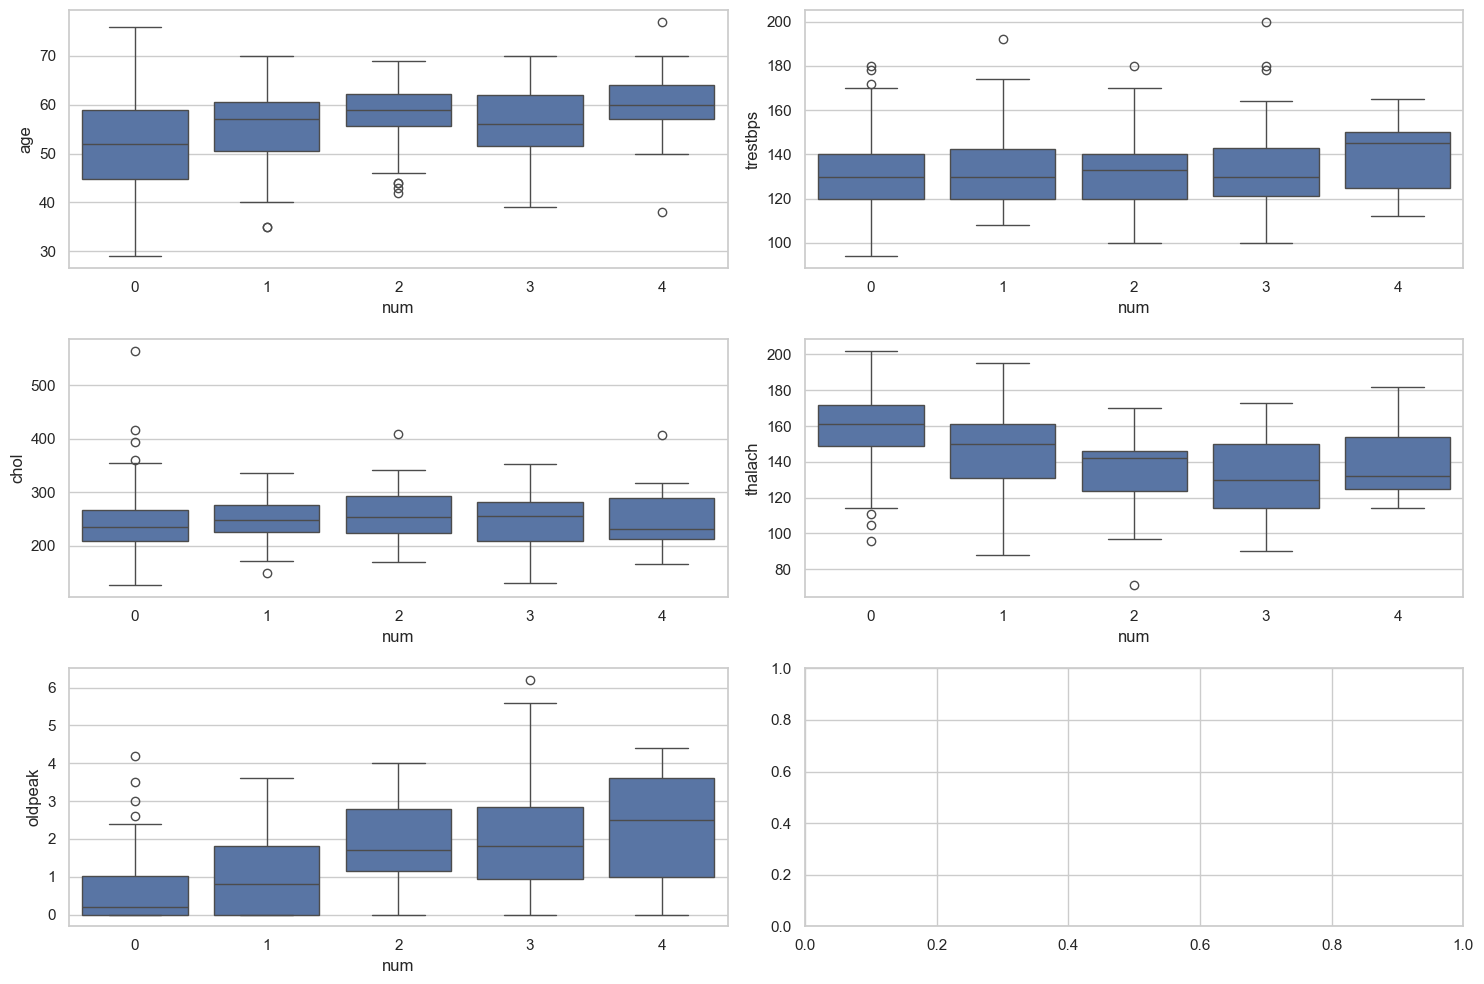

In [88]:
# Boxplots for continuous variables
continuous_vars = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(15, 10))
for i, var in enumerate(continuous_vars):
    row, col = i // 2, i % 2
    sns.boxplot(x='num', y=var, data=data, ax=axes[row][col])
plt.tight_layout()
plt.show()


## Percentage of people having Heart Disease


In [89]:
# Convert 'num' to integer for calculation (if not already done)
data['num_int'] = data['num'].astype(int)

# Calculate counts of heart disease presence and absence
absence_count = (data['num_int'] == 0).sum()
presence_count = (data['num_int'] > 0).sum()
total_patients = len(data)

# Calculate percentages
absence_percentage = (absence_count / total_patients) * 100
presence_percentage = (presence_count / total_patients) * 100

# Display the counts and percentages
print(f"Heart Disease Absence: {absence_count} patients ({absence_percentage:.2f}%)")
print(f"Heart Disease Presence: {presence_count} patients ({presence_percentage:.2f}%)")

# Optionally, you can drop the temporary 'num_int' column if no longer needed
data.drop('num_int', axis=1, inplace=True)


Heart Disease Absence: 164 patients (54.13%)
Heart Disease Presence: 139 patients (45.87%)


## Pie Chart of Heart Disease Population Percentage

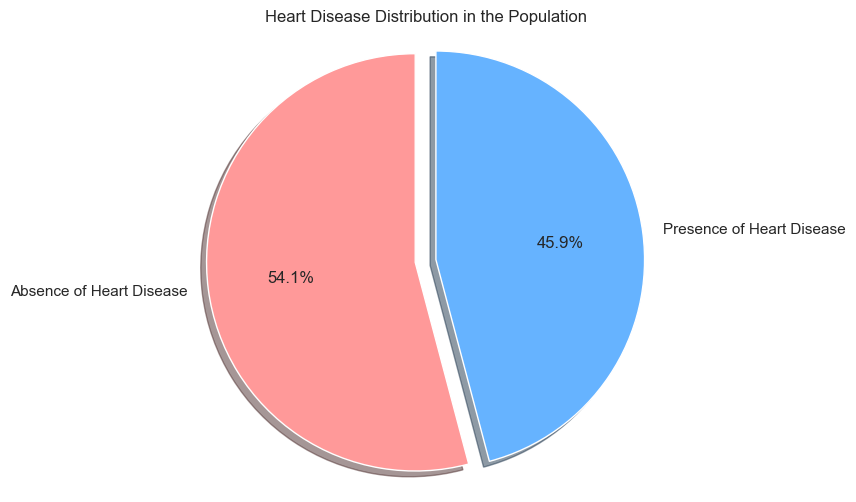

In [90]:
# Convert 'num' to integer for calculation (if not already done)
data['num_int'] = data['num'].astype(int)

# Calculate counts of heart disease presence and absence
absence_count = (data['num_int'] == 0).sum()
presence_count = (data['num_int'] > 0).sum()

# Data to plot
labels = 'Absence of Heart Disease', 'Presence of Heart Disease'
sizes = [absence_count, presence_count]
colors = ['#ff9999','#66b3ff']  # light pink and light blue
explode = (0.1, 0)  # explode 1st slice (Absence)

# Plotting the pie chart
plt.figure(figsize=(8, 6))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=90)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Heart Disease Distribution in the Population')
plt.show()

# Optionally, you can drop the temporary 'num_int' column if no longer needed
data.drop('num_int', axis=1, inplace=True)

## Countplot of Population Age

C:\Users\prakh\AppData\Local\Temp\ipykernel_29976\2920194859.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  age_countplot = sns.countplot(x='age', data=data, palette='coolwarm')


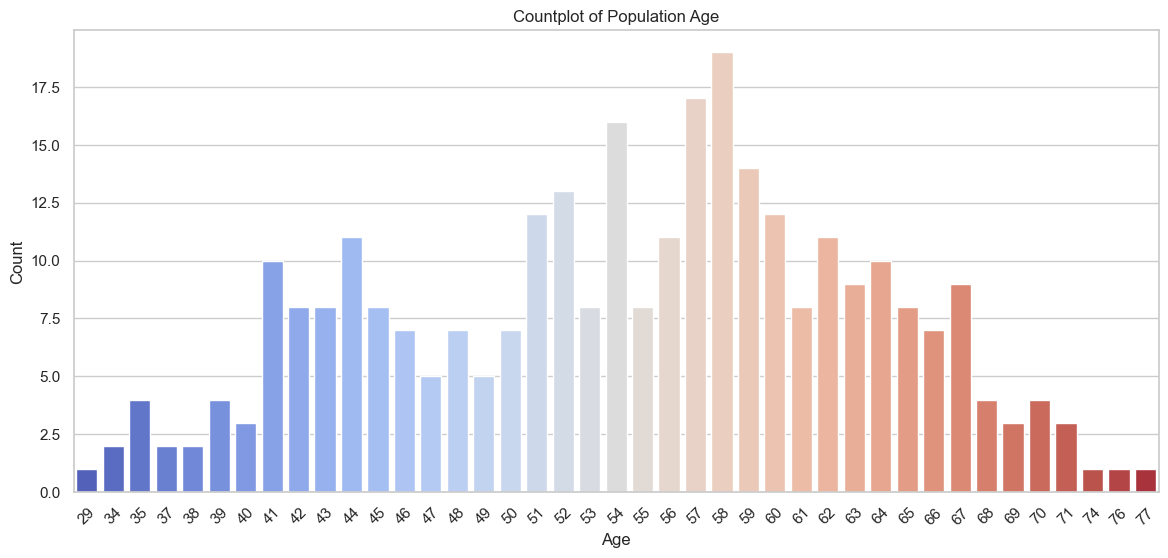

In [91]:
import matplotlib.pyplot as plt
import seaborn as sns

# Setting the aesthetic style of the plots
sns.set(style="whitegrid")

# Creating the countplot of age
plt.figure(figsize=(14, 6))  # Width, height in inches
age_countplot = sns.countplot(x='age', data=data, palette='coolwarm')

# Enhancing the plot with Matplotlib functions
age_countplot.set_title('Countplot of Population Age')
age_countplot.set_xlabel('Age')
age_countplot.set_ylabel('Count')
plt.xticks(rotation=45)  # Rotating x labels for better readability
plt.show()


## Bar Plot of Age Category

In [92]:
# Define age categories
bins = [0, 35, 55, np.inf]  # Age ranges
labels = ['Young (<35)', 'Middle-Aged (35-55)', 'Senior (>55)']
data['Age Category'] = pd.cut(data['age'], bins=bins, labels=labels)

# Display the new DataFrame with age categories
display(data[['age', 'Age Category']].head())

,age,Age Category
0,63,Senior (>55)
1,67,Senior (>55)
2,67,Senior (>55)
3,37,Middle-Aged (35-55)
4,41,Middle-Aged (35-55)


C:\Users\prakh\AppData\Local\Temp\ipykernel_29976\3535333186.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  age_cat_plot = sns.countplot(x='Age Category', data=data, palette='viridis', order=['Young (<35)', 'Middle-Aged (35-55)', 'Senior (>55)'])


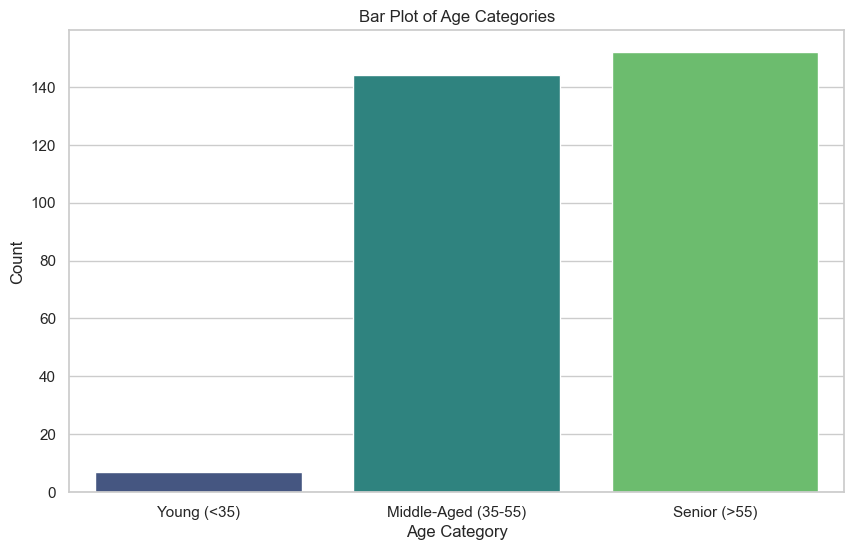

In [93]:

# Set the aesthetic style of the plots
sns.set(style="whitegrid")

# Creating the bar plot for age categories
plt.figure(figsize=(10, 6))  # Width, height in inches
age_cat_plot = sns.countplot(x='Age Category', data=data, palette='viridis', order=['Young (<35)', 'Middle-Aged (35-55)', 'Senior (>55)'])

# Enhancing the plot with Matplotlib functions
age_cat_plot.set_title('Bar Plot of Age Categories')
age_cat_plot.set_xlabel('Age Category')
age_cat_plot.set_ylabel('Count')
plt.show()


## Swarm Plo of Gender Based Age Category

In [94]:
# Convert 'sex' numerical data to categorical labels
data['gender'] = data['sex'].map({1: 'Male', 0: 'Female'})

# Display the first few rows to confirm the new 'gender' column
display(data[['sex', 'gender']].head())


,sex,gender
0,1,Male
1,1,Male
2,1,Male
3,1,Male
4,0,Female


In [95]:
# Define age categories
bins = [0, 18, 40, 65, np.inf]
labels = ['Youth (<18)', 'Adult (18-40)', 'Middle-Aged (40-65)', 'Senior (>65)']
data['Age_Range'] = pd.cut(data['age'], bins=bins, labels=labels)

# Display the first few rows to confirm the new 'Age_Range' column
display(data[['age', 'Age_Range']].head())


,age,Age_Range
0,63,Middle-Aged (40-65)
1,67,Senior (>65)
2,67,Senior (>65)
3,37,Adult (18-40)
4,41,Middle-Aged (40-65)


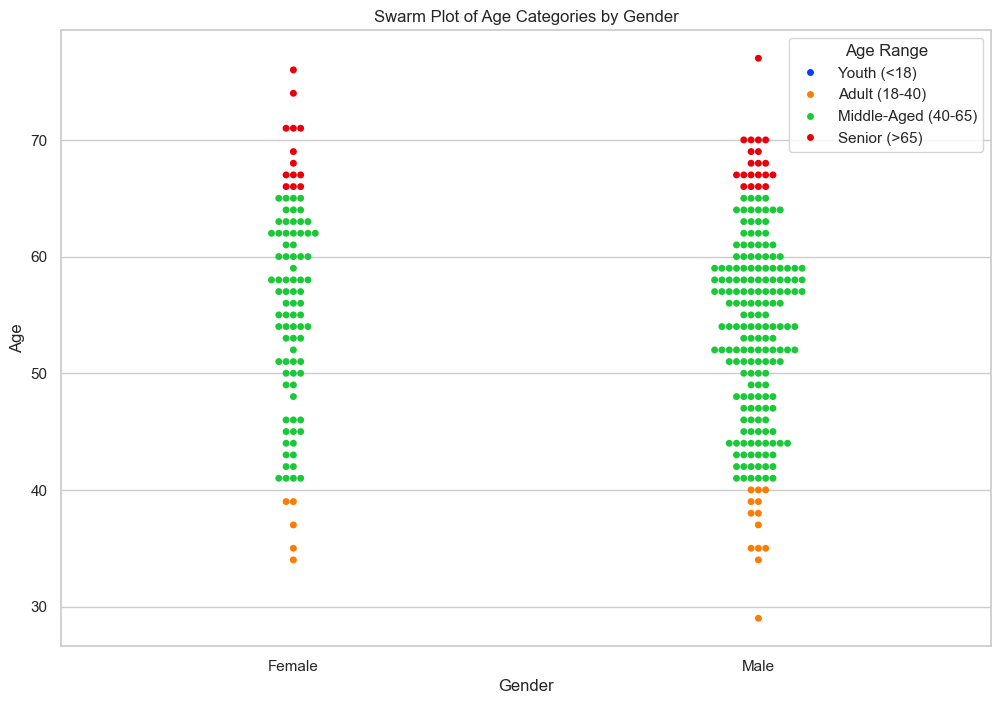

In [96]:

# Set the aesthetic style of the plots
sns.set(style="whitegrid")

# Ensure that age categories and gender are appropriate for a swarm plot
data['gender'] = data['sex'].map({1: 'Male', 0: 'Female'})
bins = [0, 18, 40, 65, np.inf]
labels = ['Youth (<18)', 'Adult (18-40)', 'Middle-Aged (40-65)', 'Senior (>65)']
data['Age_Range'] = pd.cut(data['age'], bins=bins, labels=labels)

# Creating the swarm plot
plt.figure(figsize=(12, 8))  # Width, height in inches
swarm_plot = sns.swarmplot(x='gender', y='age', hue='Age_Range', data=data, palette='bright')

# Enhancing the plot with Matplotlib functions
swarm_plot.set_title('Swarm Plot of Age Categories by Gender')
swarm_plot.set_xlabel('Gender')
swarm_plot.set_ylabel('Age')
plt.legend(title='Age Range')
plt.show()


## Count Plot of Heart Disease Based On Age Category

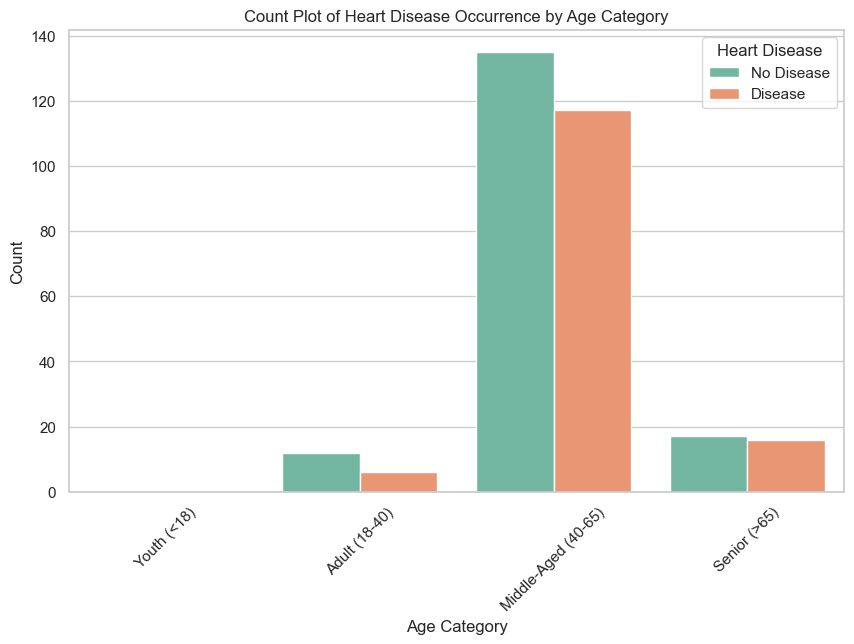

In [97]:
# Assuming data['num'] might still be a categorical variable or needs clearer labels
# Convert 'num' to a clear categorical label if not already done
data['Heart Disease'] = data['num'].apply(lambda x: 'Disease' if x > 0 else 'No Disease')

# Re-checking age categorization
bins = [0, 18, 40, 65, np.inf]
labels = ['Youth (<18)', 'Adult (18-40)', 'Middle-Aged (40-65)', 'Senior (>65)']
data['Age_Range'] = pd.cut(data['age'], bins=bins, labels=labels)

# Creating the count plot for heart disease occurrence by age category
plt.figure(figsize=(10, 6))  # Width, height in inches
count_plot = sns.countplot(x='Age_Range', hue='Heart Disease', data=data, palette='Set2', order=labels)

# Enhancing the plot
count_plot.set_title('Count Plot of Heart Disease Occurrence by Age Category')
count_plot.set_xlabel('Age Category')
count_plot.set_ylabel('Count')
plt.legend(title='Heart Disease', loc='upper right')
plt.xticks(rotation=45)  # Rotating x labels for better readability
plt.show()


## Count Plot of Heart Disease Based on Gender

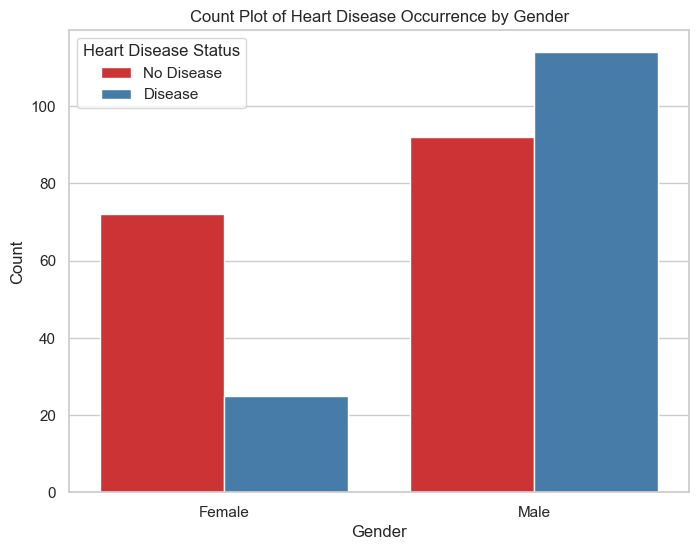

In [98]:
# Set the aesthetic style of the plots
sns.set(style="whitegrid")

# Convert 'num' to a clear categorical label if not already done
data['Heart Disease'] = data['num'].apply(lambda x: 'Disease' if x > 0 else 'No Disease')

# Convert 'sex' to a gender label if not already done
data['Gender'] = data['sex'].map({1: 'Male', 0: 'Female'})

# Creating the count plot for heart disease occurrence by gender
plt.figure(figsize=(8, 6))  # Width, height in inches
gender_count_plot = sns.countplot(x='Gender', hue='Heart Disease', data=data, palette='Set1')

# Enhancing the plot with Matplotlib functions
gender_count_plot.set_title('Count Plot of Heart Disease Occurrence by Gender')
gender_count_plot.set_xlabel('Gender')
gender_count_plot.set_ylabel('Count')
plt.legend(title='Heart Disease Status')
plt.show()

## Count Plot of Chest Pain Types Experienced

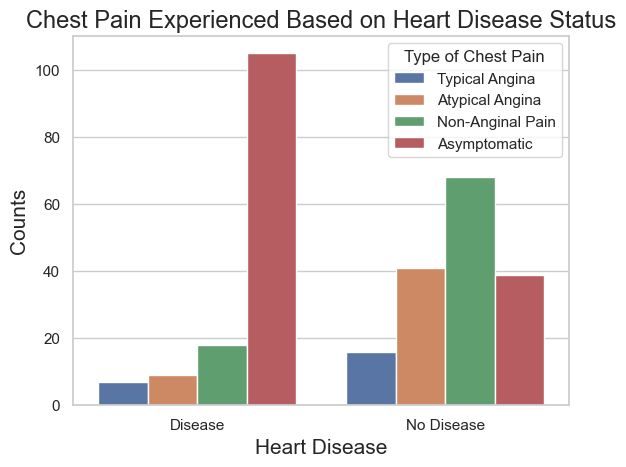

In [99]:
import seaborn as sns
import matplotlib.pyplot as plt

# Convert 'num' to a clear categorical label for heart disease status
data['Heart_Disease'] = data['num'].apply(lambda x: 'Disease' if x > 0 else 'No Disease')

# Map chest pain types from numerical codes to descriptive labels
cp_labels = {
    1: 'Typical Angina',    # Classic chest pain related to heart deficiency
    2: 'Atypical Angina',   # Chest pain not related to the heart
    3: 'Non-Anginal Pain',  # Typically esophageal spasms (non-heart related)
    4: 'Asymptomatic'       # No symptoms showing
}
data['Chest Pain Description'] = data['cp'].map(cp_labels)

# Creating the count plot
sns.countplot(x='Heart_Disease', hue='Chest Pain Description', data=data, order=['Disease', 'No Disease'])
plt.title('Chest Pain Experienced Based on Heart Disease Status', fontsize=17)
plt.xlabel('Heart Disease', fontsize=15)
plt.ylabel('Counts', fontsize=15)
plt.legend(title='Type of Chest Pain', labels=['Typical Angina', 'Atypical Angina', 'Non-Anginal Pain', 'Asymptomatic'])
plt.show()


## Count Plot of Chest Pain Types Based on Gender

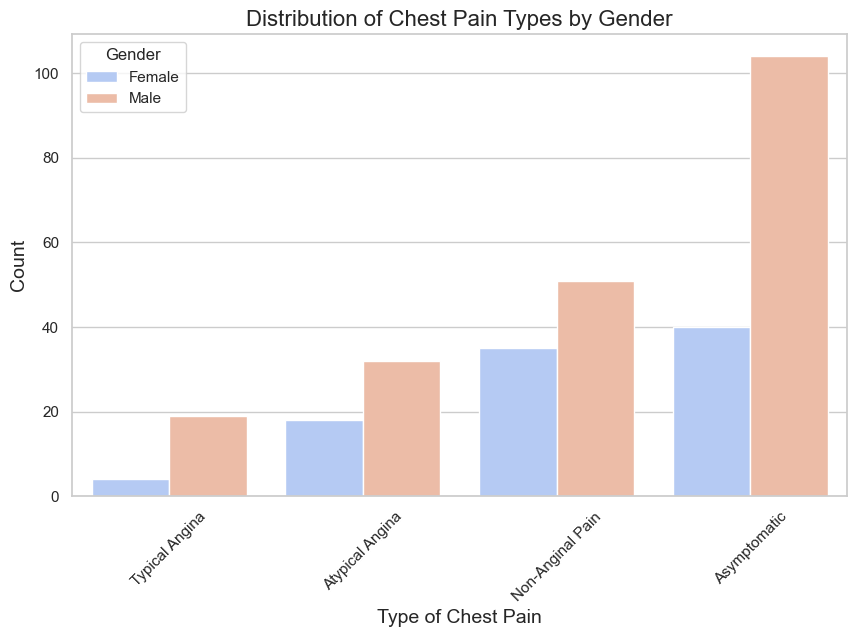

In [100]:
# Convert 'sex' to a gender label if not already done
data['Gender'] = data['sex'].map({1: 'Male', 0: 'Female'})

# Map chest pain types from numerical codes to descriptive labels if not already done
cp_labels = {
    1: 'Typical Angina',    # Classic chest pain related to heart deficiency
    2: 'Atypical Angina',   # Chest pain not related to the heart
    3: 'Non-Anginal Pain',  # Typically esophageal spasms (non-heart related)
    4: 'Asymptomatic'       # No symptoms showing
}
data['Chest Pain Type'] = data['cp'].map(cp_labels)

# Creating the count plot for types of chest pain experienced, grouped by gender
plt.figure(figsize=(10, 6))
cp_gender_plot = sns.countplot(x='Chest Pain Type', hue='Gender', data=data, palette='coolwarm')

# Enhancing the plot with Matplotlib functions
cp_gender_plot.set_title('Distribution of Chest Pain Types by Gender', fontsize=16)
cp_gender_plot.set_xlabel('Type of Chest Pain', fontsize=14)
cp_gender_plot.set_ylabel('Count', fontsize=14)
plt.legend(title='Gender')
plt.xticks(rotation=45)  # Rotating x labels for better readability
plt.show()

## Count Plot of Chest Pain Types Based on Age Category

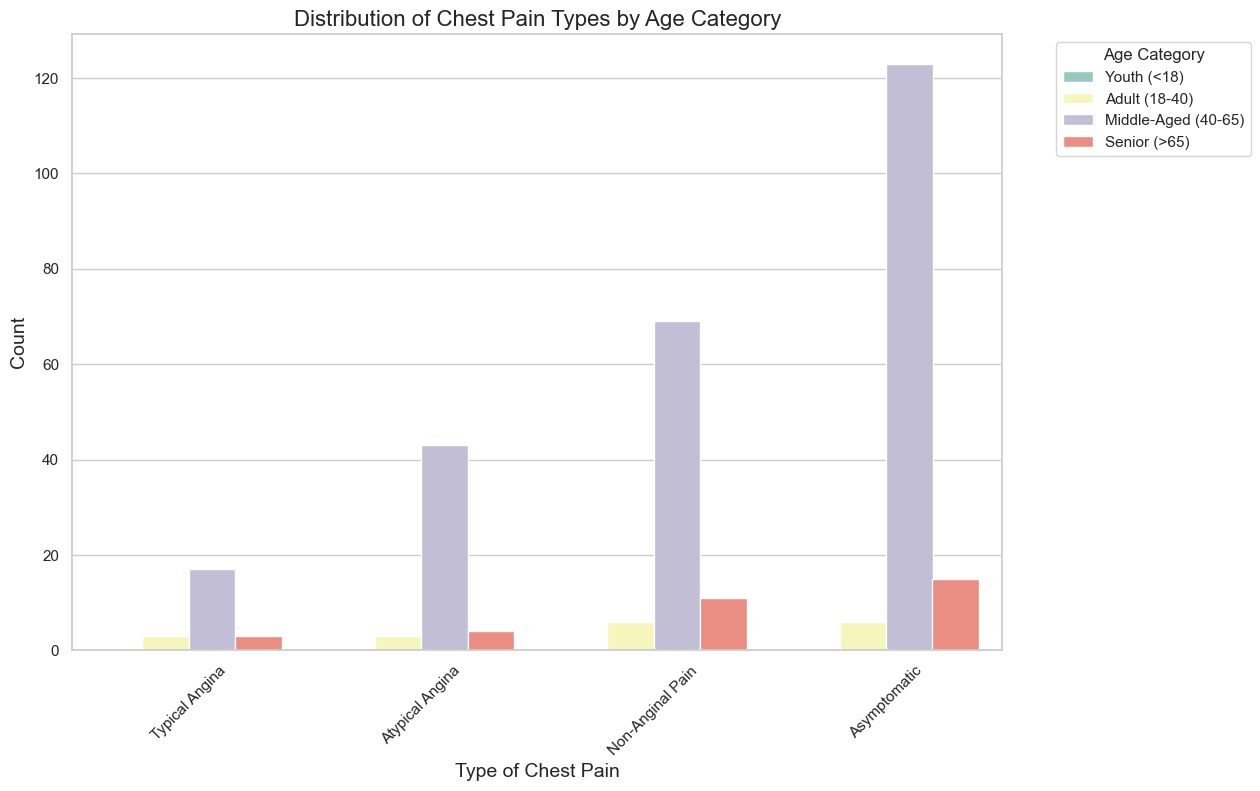

In [101]:
# Set the aesthetic style of the plots
sns.set(style="whitegrid")

# Ensure that age ranges are set properly, if not already done
bins = [0, 18, 40, 65, np.inf]
labels = ['Youth (<18)', 'Adult (18-40)', 'Middle-Aged (40-65)', 'Senior (>65)']
data['Age Category'] = pd.cut(data['age'], bins=bins, labels=labels)

# Map chest pain types from numerical codes to descriptive labels, if not already done
cp_labels = {
    1: 'Typical Angina',    # Classic chest pain related to heart deficiency
    2: 'Atypical Angina',   # Chest pain not related to the heart
    3: 'Non-Anginal Pain',  # Typically esophageal spasms (non-heart related)
    4: 'Asymptomatic'       # No symptoms showing
}
data['Chest Pain Type'] = data['cp'].map(cp_labels)

# Creating the count plot for types of chest pain experienced, grouped by age category
plt.figure(figsize=(12, 8))
age_cp_count_plot = sns.countplot(x='Chest Pain Type', hue='Age Category', data=data, palette='Set3')

# Enhancing the plot with Matplotlib functions
age_cp_count_plot.set_title('Distribution of Chest Pain Types by Age Category', fontsize=16)
age_cp_count_plot.set_xlabel('Type of Chest Pain', fontsize=14)
age_cp_count_plot.set_ylabel('Count', fontsize=14)
plt.legend(title='Age Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)  # Rotating x labels for better readability
plt.show()

## Bar Plot of Person's Resting Blood Pressure

C:\Users\prakh\AppData\Local\Temp\ipykernel_29976\616041302.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_blood_pressure_by_gender = data.groupby('Gender')['trestbps'].mean().reset_index()
C:\Users\prakh\AppData\Local\Temp\ipykernel_29976\616041302.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bp_bar_plot = sns.barplot(x='Gender', y='trestbps', data=avg_blood_pressure_by_gender, palette='coolwarm')


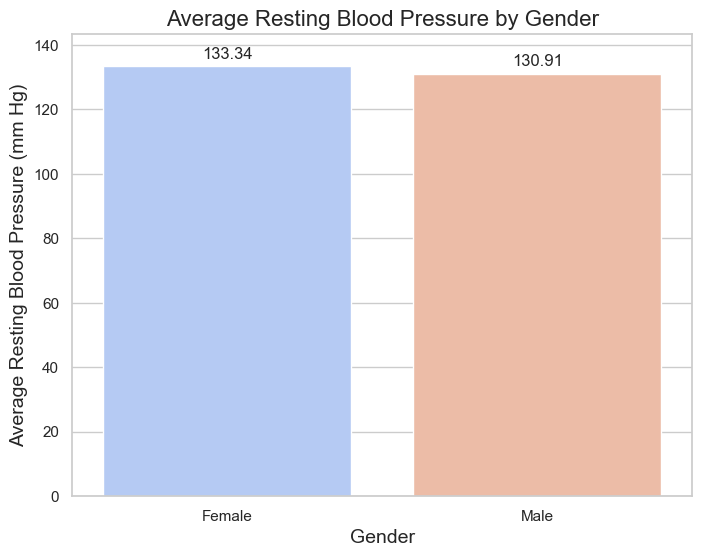

In [102]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the aesthetic style of the plots
sns.set(style="whitegrid")

# Preparing the data as before
data['Gender'] = data['sex'].map({1: 'Male', 0: 'Female'})
avg_blood_pressure_by_gender = data.groupby('Gender')['trestbps'].mean().reset_index()

# Creating the bar plot
plt.figure(figsize=(8, 6))
bp_bar_plot = sns.barplot(x='Gender', y='trestbps', data=avg_blood_pressure_by_gender, palette='coolwarm')

# Adding annotations
for p in bp_bar_plot.patches:
    bp_bar_plot.annotate(format(p.get_height(), '.2f'), 
                         (p.get_x() + p.get_width() / 2., p.get_height()), 
                         ha = 'center', va = 'center', 
                         xytext = (0, 9), 
                         textcoords = 'offset points')

# Enhancing the plot with Matplotlib functions
bp_bar_plot.set_title('Average Resting Blood Pressure by Gender', fontsize=16)
bp_bar_plot.set_xlabel('Gender', fontsize=14)
bp_bar_plot.set_ylabel('Average Resting Blood Pressure (mm Hg)', fontsize=14)
plt.ylim(0, avg_blood_pressure_by_gender['trestbps'].max() + 10)  # Adjust y-limit to add some space
plt.show()


## Bar Plot of Cholesterol Levels Based on Heart Disease Status

C:\Users\prakh\AppData\Local\Temp\ipykernel_29976\2756615267.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  cholesterol_bar_plot = sns.barplot(x='Heart Disease Status', y='chol', data=avg_cholesterol_by_disease, palette='coolwarm')


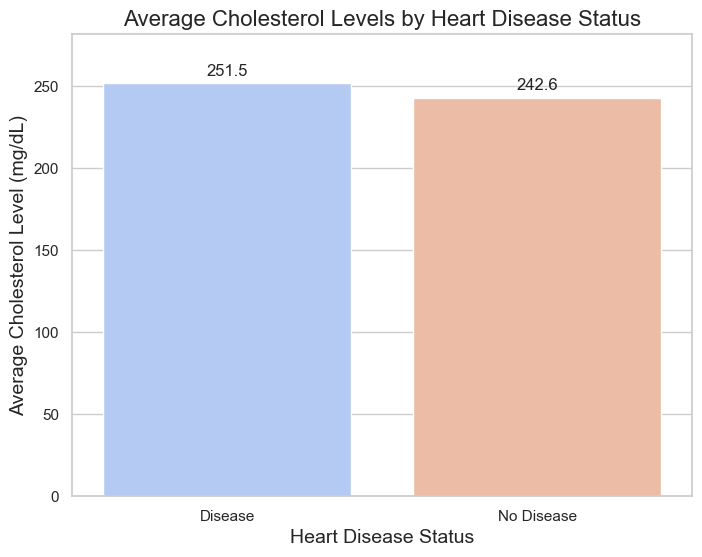

In [103]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the aesthetic style of the plots
sns.set(style="whitegrid")

# Convert 'num' to a clear categorical label for heart disease status
data['Heart Disease Status'] = data['num'].apply(lambda x: 'Disease' if x > 0 else 'No Disease')

# Calculate the average cholesterol levels by heart disease status
avg_cholesterol_by_disease = data.groupby('Heart Disease Status')['chol'].mean().reset_index()

# Creating the bar plot for average cholesterol levels by heart disease status
plt.figure(figsize=(8, 6))
cholesterol_bar_plot = sns.barplot(x='Heart Disease Status', y='chol', data=avg_cholesterol_by_disease, palette='coolwarm')

# Adding annotations for exact average values
for p in cholesterol_bar_plot.patches:
    cholesterol_bar_plot.annotate(format(p.get_height(), '.1f'), 
                                  (p.get_x() + p.get_width() / 2., p.get_height()), 
                                  ha='center', va='center', 
                                  xytext=(0, 9), 
                                  textcoords='offset points')

# Enhancing the plot with Matplotlib functions
cholesterol_bar_plot.set_title('Average Cholesterol Levels by Heart Disease Status', fontsize=16)
cholesterol_bar_plot.set_xlabel('Heart Disease Status', fontsize=14)
cholesterol_bar_plot.set_ylabel('Average Cholesterol Level (mg/dL)', fontsize=14)
plt.ylim(0, avg_cholesterol_by_disease['chol'].max() + 30)  # Adjust y-limit to add some space
plt.show()


## Bar Plot of Cholesterol vs. Heart Disease

C:\Users\prakh\AppData\Local\Temp\ipykernel_29976\2200912711.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Heart Disease', y='chol', data=data, palette='viridis')


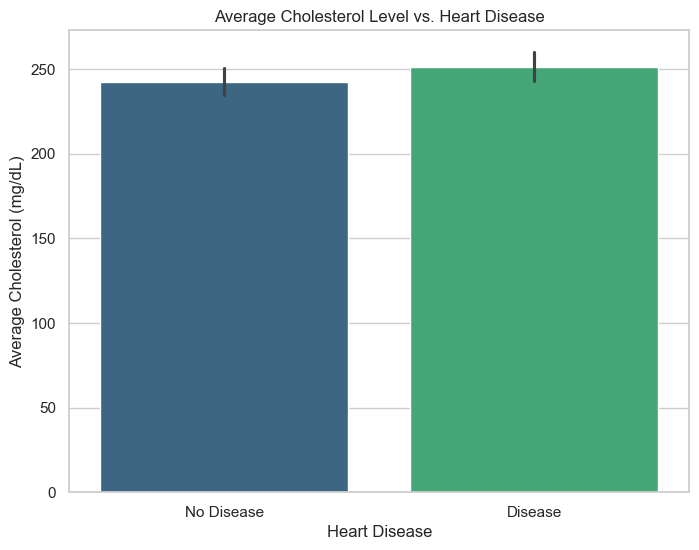

In [104]:

# Setting up heart disease status for clear visualization
data['Heart Disease'] = data['num'].apply(lambda x: 'Disease' if x > 0 else 'No Disease')

# Bar plot for average cholesterol levels by heart disease status
plt.figure(figsize=(8, 6))
sns.barplot(x='Heart Disease', y='chol', data=data, palette='viridis')
plt.title('Average Cholesterol Level vs. Heart Disease')
plt.ylabel('Average Cholesterol (mg/dL)')
plt.show()



## Bar Plot of Blood Pressure vs. Heart Disease

C:\Users\prakh\AppData\Local\Temp\ipykernel_29976\4159169931.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Heart Disease', y='trestbps', data=data, palette='viridis')


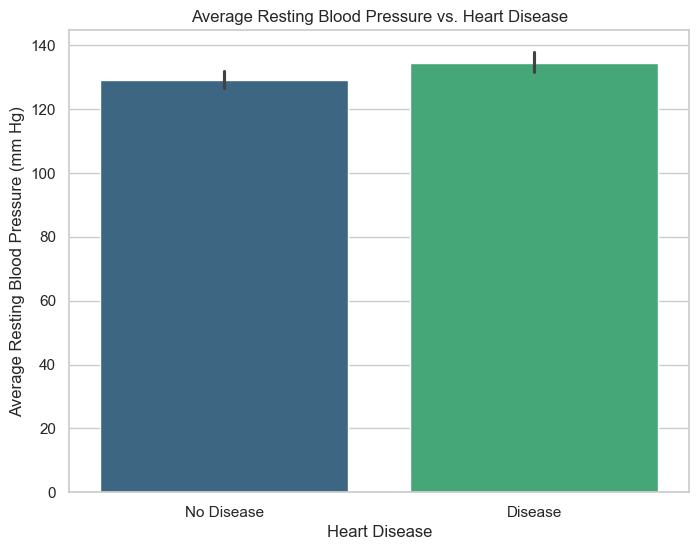

In [105]:
plt.figure(figsize=(8, 6))
sns.barplot(x='Heart Disease', y='trestbps', data=data, palette='viridis')
plt.title('Average Resting Blood Pressure vs. Heart Disease')
plt.ylabel('Average Resting Blood Pressure (mm Hg)')
plt.show()


## Line Plot of Blood Pressure vs. Age

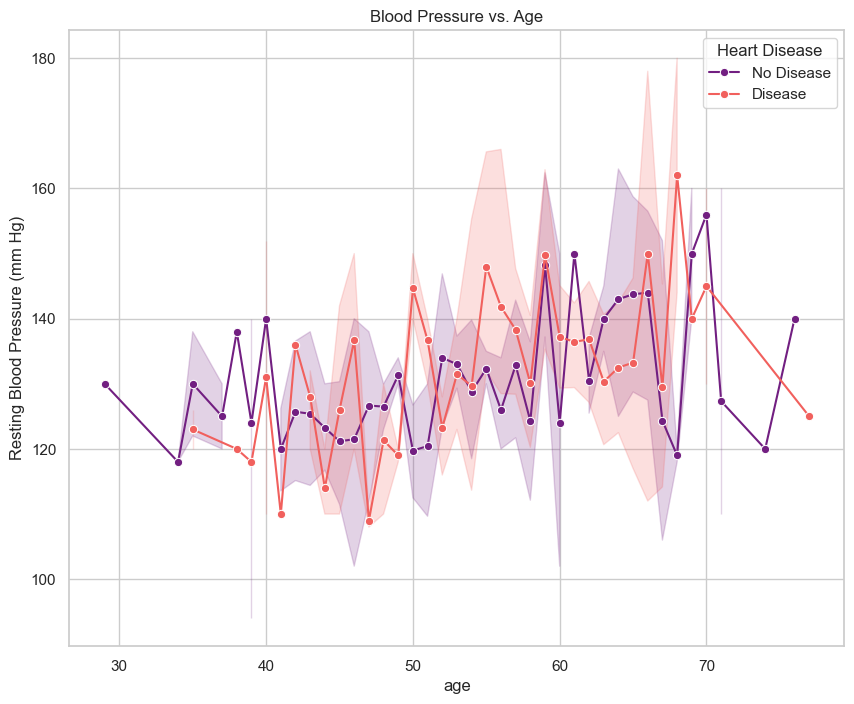

In [106]:
plt.figure(figsize=(10, 8))
sns.lineplot(x='age', y='trestbps', data=data, marker='o', hue='Heart Disease', palette='magma')
plt.title('Blood Pressure vs. Age')
plt.ylabel('Resting Blood Pressure (mm Hg)')
plt.show()


## Line Plot of Cholesterol vs. Age

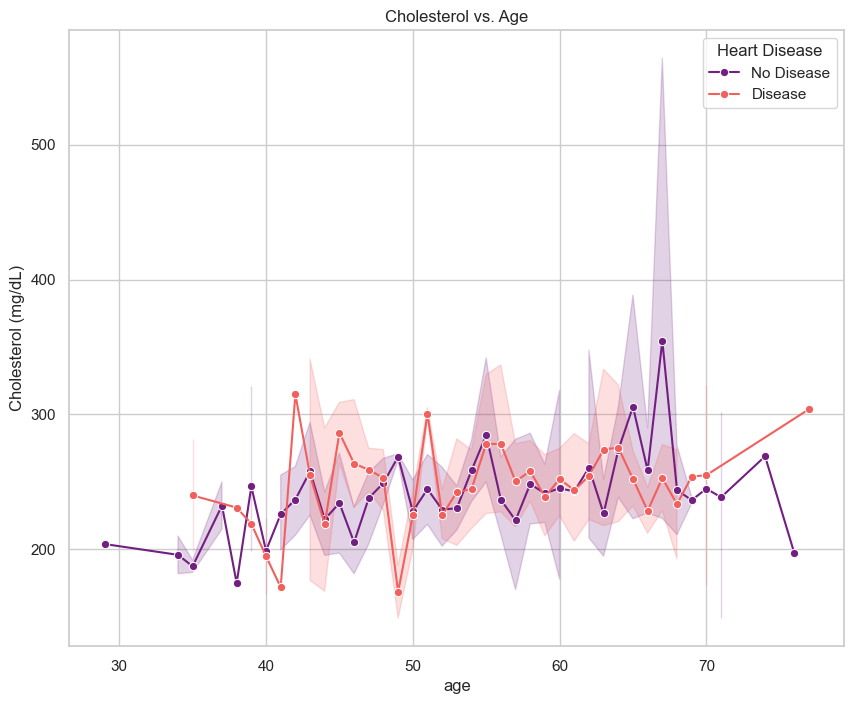

In [107]:
plt.figure(figsize=(10, 8))
sns.lineplot(x='age', y='chol', data=data, marker='o', hue='Heart Disease', palette='magma')
plt.title('Cholesterol vs. Age')
plt.ylabel('Cholesterol (mg/dL)')
plt.show()


## Line Plot of ST Depression vs. Age


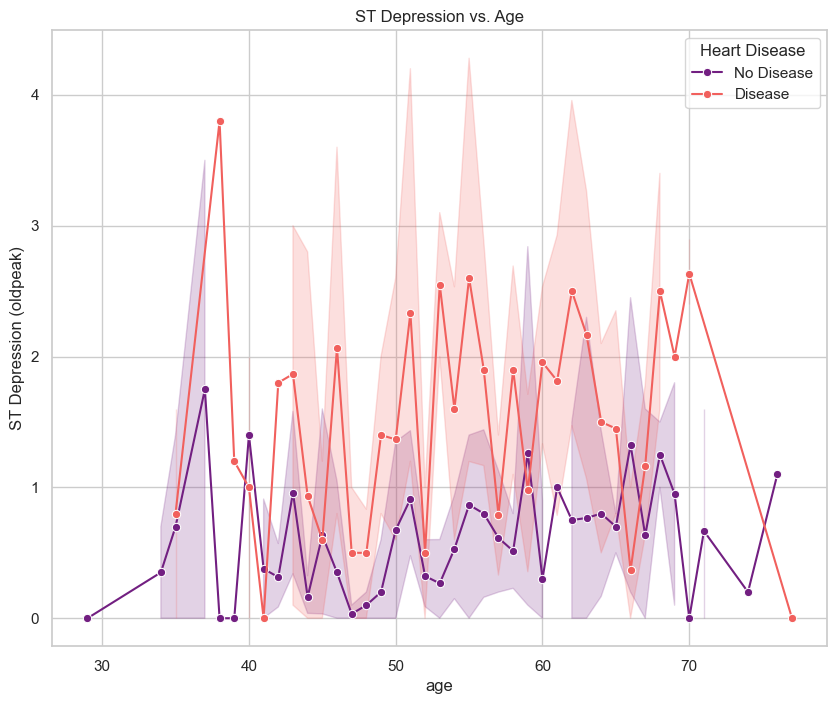

In [108]:
plt.figure(figsize=(10, 8))
sns.lineplot(x='age', y='oldpeak', data=data, marker='o', hue='Heart Disease', palette='magma')
plt.title('ST Depression vs. Age')
plt.ylabel('ST Depression (oldpeak)')
plt.show()


## Bar Plot of Exercise With Angina vs. Heart Disease

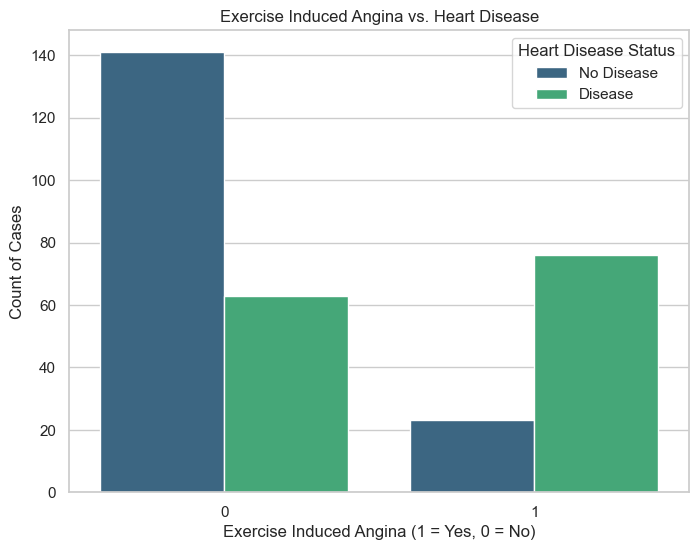

In [109]:

plt.figure(figsize=(8, 6))
sns.countplot(x='exang', hue='Heart Disease', data=data, palette='viridis')
plt.title('Exercise Induced Angina vs. Heart Disease')
plt.xlabel('Exercise Induced Angina (1 = Yes, 0 = No)')
plt.ylabel('Count of Cases')
plt.legend(title='Heart Disease Status')
plt.show()

## Bar Plot of Exercise With Angina vs. Gender

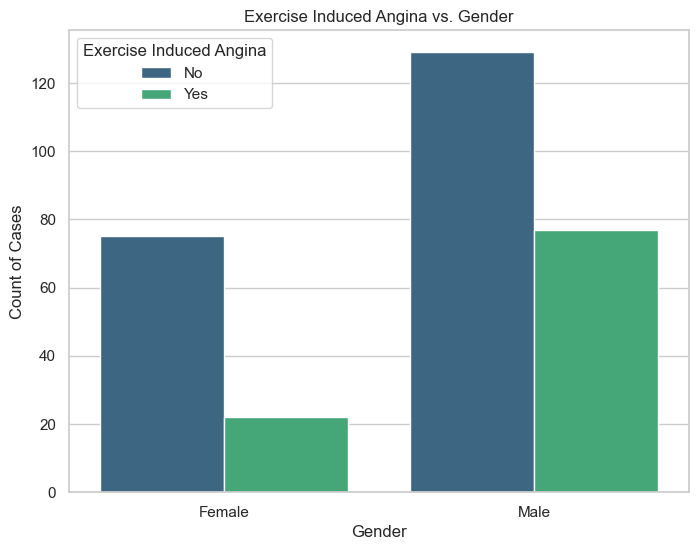

In [110]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Gender', hue='exang', data=data, palette='viridis')
plt.title('Exercise Induced Angina vs. Gender')
plt.xlabel('Gender')
plt.ylabel('Count of Cases')
plt.legend(title='Exercise Induced Angina', labels=['No', 'Yes'])
plt.show()


## Bar Plot of Fasting Blood Sugar vs. Gender

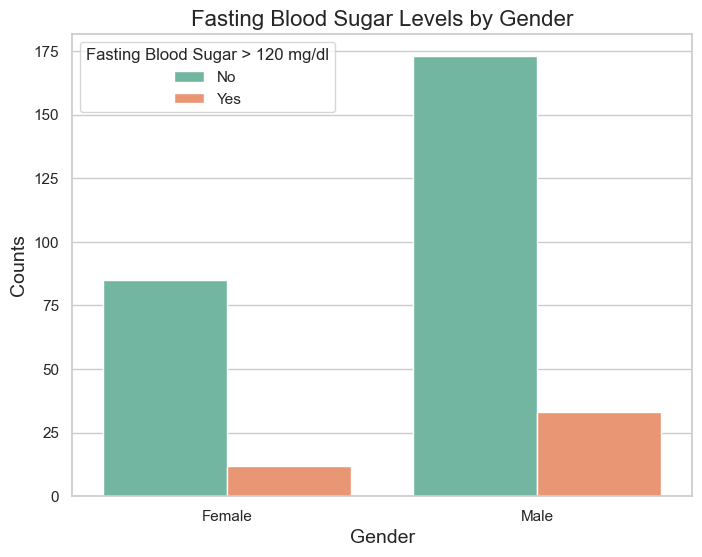

In [111]:
# Ensure gender is appropriately labeled if not already done
data['Gender'] = data['sex'].map({1: 'Male', 0: 'Female'})

# Assume 'fbs' is coded as (1 = true; fasting blood sugar > 120 mg/dl, 0 = false)

# Creating the bar plot for fasting blood sugar levels by gender
plt.figure(figsize=(8, 6))
fbs_gender_plot = sns.countplot(x='Gender', hue='fbs', data=data, palette='Set2')

# Enhancing the plot with Matplotlib functions
fbs_gender_plot.set_title('Fasting Blood Sugar Levels by Gender', fontsize=16)
fbs_gender_plot.set_xlabel('Gender', fontsize=14)
fbs_gender_plot.set_ylabel('Counts', fontsize=14)
plt.legend(title='Fasting Blood Sugar > 120 mg/dl', labels=['No', 'Yes'])
plt.show()
